# Prediction on Homicide Reports, 1980-2014
### Aoife Sayers T00170881
### Big Data CA2 2018

Importing Modules

In [176]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt

 Reading in CSV Dataset

In [177]:
df = pd.read_csv('database.csv', low_memory=False)

## Basic Exploratory Data Analysis

In [178]:
df.shape

(638454, 24)

In [179]:
df.head(5)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


## Pre-processing

Casting string columns in the dataset to numeric

In [180]:
df['Perpetrator Age'] = pd.to_numeric(df['Perpetrator Age'], errors='coerce')
df['Victim Count'] = pd.to_numeric(df['Victim Count'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

Deleting unrequired columns

In [181]:
del df['Record ID']
del df['Agency Code']
del df['Agency Name']
del df['Agency Type']

Removing Age 0 

In [182]:
perpAges = df[df['Perpetrator Age'] != 0]

## Descriptive Analytics

### Solved vs Unsolved Crimes

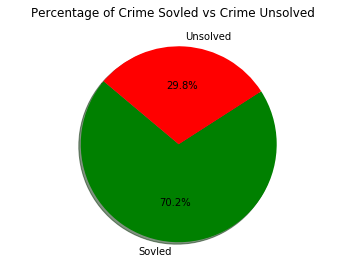

In [183]:
solved = len(df[df["Crime Solved"]=="Yes"])
notsolved = len(df[df["Crime Solved"]=="No"])

labels = ["Sovled","Unsolved"]
sizes= [solved,notsolved]
colors = ['green','red'] 
plt.suptitle('Percentage of Crime Sovled vs Crime Unsolved')
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


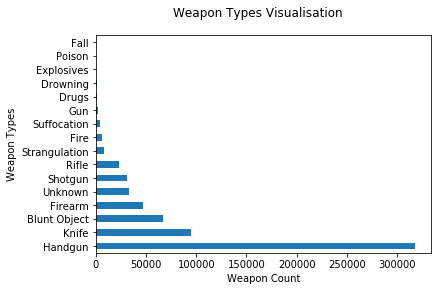

In [184]:
df.Weapon.value_counts().plot(kind='barh')
plt.suptitle('Weapon Types Visualisation')
plt.ylabel('Weapon Types')
plt.xlabel('Weapon Count')
plt.show()

### Relationships

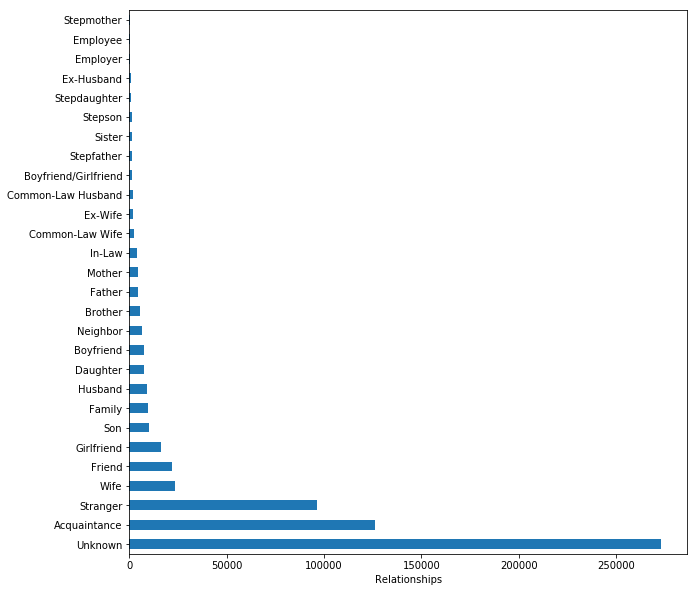

In [185]:
plt.figure(figsize=(10,10))
df.Relationship.value_counts().plot(kind='barh')
plt.xlabel('Relationships')
plt.show()

In [186]:
#The types of relationships
df['Relationship'].unique()

array(['Acquaintance', 'Unknown', 'Wife', 'Stranger', 'Girlfriend',
       'Ex-Husband', 'Brother', 'Stepdaughter', 'Husband', 'Sister',
       'Friend', 'Family', 'Neighbor', 'Father', 'In-Law', 'Son',
       'Ex-Wife', 'Boyfriend', 'Mother', 'Common-Law Husband',
       'Common-Law Wife', 'Stepfather', 'Stepson', 'Stepmother',
       'Daughter', 'Boyfriend/Girlfriend', 'Employer', 'Employee'], dtype=object)

### Gun Violence

Interpretation of gun violence is where the following weapons have been used:
- Hangun
- Rifle
- Shotgun
- Firearm

In [187]:
#Creating a dataframe with all the weapons as handguns
gunHomicides = df[(df['Weapon']=='Handgun') | (df['Weapon']=='Rifle') | (df['Weapon']=='Shotgun') | (df['Weapon']=='Firearm')]

print("Most Common State for Gun Homicides: \n" + str(gunHomicides['State'].mode()))

caliHomicides = len(gunHomicides[gunHomicides['State']=='California'])
print("\n\nGun Homicide in California: " + str(caliHomicides))


Most Common State for Gun Homicides: 
0    California
dtype: object


Gun Homicide in California: 68230


### Perpetrator Profile

Perpetrator Sex

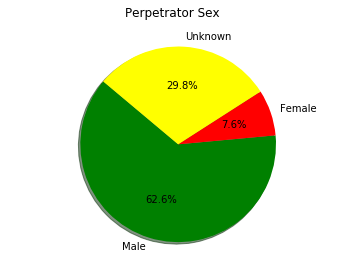

In [188]:
labels = ["Male","Female","Unknown"]
sizes= [len(df[(df['Perpetrator Sex']=='Male')]),len(df[(df['Perpetrator Sex']=='Female')]),len(df[(df['Perpetrator Sex']=='Unknown')])]
colors = ['green','red','yellow'] 
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.suptitle('Perpetrator Sex')
plt.axis('equal')
plt.show()

Perpetrator Race

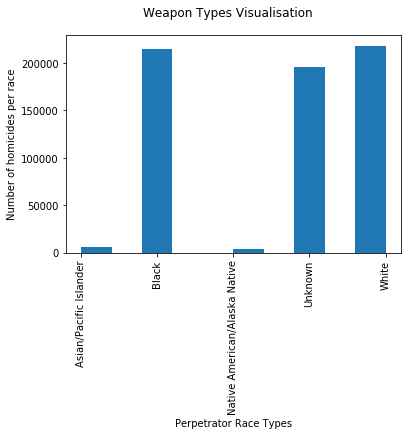

In [189]:
plt.hist(df['Perpetrator Race'])
plt.suptitle('Perpetrator Race')
plt.xticks(rotation=90)
plt.ylabel('Number of homicides per race')
plt.xlabel('Perpetrator Race Types')
plt.suptitle('Weapon Types Visualisation')
plt.show()

Perpetrator Age Profile

In [190]:
print('Mean Age: ' + str(df['Perpetrator Age'].mean()))
print('Oldest Age of  Perpetrator: ' +  str(df['Perpetrator Age'].max()))
print('Youngest Age of Perpetrator: ' + str(df['Perpetrator Age'].min()))
print('Standard Deviation: ' + str(df['Perpetrator Age'].std()))

minor = df[df['Perpetrator Age']<18]
print('Number of perpetrators under 18: ' + str(len(minor)))
senior = df[df['Perpetrator Age']>65]
print('Number of perpetrators over 65: ' + str(len(senior)))

Mean Age: 20.32269720715542
Oldest Age of  Perpetrator: 99.0
Youngest Age of Perpetrator: 0.0
Standard Deviation: 17.88684181201007
Number of perpetrators under 18: 250294
Number of perpetrators over 65: 8742


### Homicides per Year

In [191]:
startYear = len(df[df['Year']==1980])
currentYear = len(df[df['Year']==2014])
percentageDecrease=((startYear-currentYear)/startYear)*(100/1)

print('Number of Homicides in 1980: ' + str(startYear) + 
      '\nNumber of Homicides in 2014: ' + str(currentYear) + 
      '\nPercentage Decrease between 1980 and 2014: ' + str(percentageDecrease))

Number of Homicides in 1980: 23092
Number of Homicides in 2014: 14331
Percentage Decrease between 1980 and 2014: 37.9395461631734


Year with the least homicides was 14331


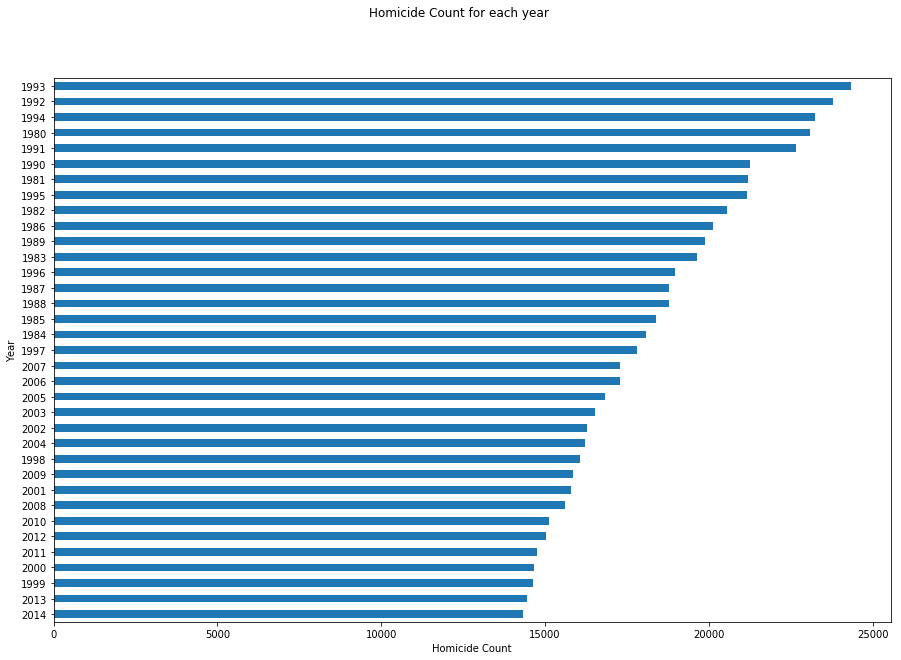

In [192]:
print('Year with the least homicides was ' + str(df['Year'].value_counts().min()) )

plt.figure(figsize=(15,10))
df.Year.value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.ylabel('Year')
plt.xlabel('Homicide Count')
plt.suptitle('Homicide Count for each year')
plt.show()

### Relationships between Perpetrator and Victims

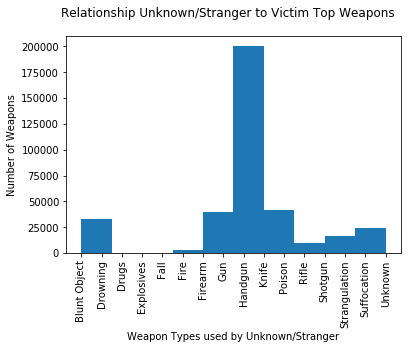

In [193]:
strangerMurder = df[ (df['Relationship']=='Stranger') | (df['Relationship']=='Unknown')]
percentStranger = len(strangerMurder)/ len(df)
plt.hist(strangerMurder['Weapon'])
plt.xticks(rotation=90)
plt.suptitle('Relationship Unknown/Stranger to Victim Top Weapons')
plt.ylabel('Number of Weapons')
plt.xlabel('Weapon Types used by Unknown/Stranger')
plt.show()

Immediate Family includes
- Wife
- Husband
- Son
- Daughter
- Brother
- Sister
- Father
- Mother
- Family

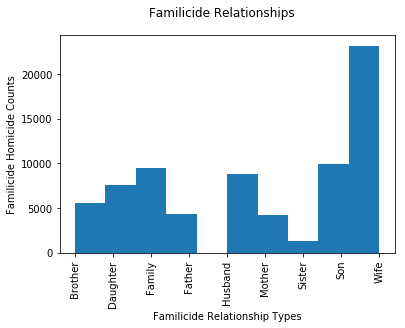

In [194]:
immediateFamilicide = df[ (df['Relationship']=='Wife') | (df['Relationship']=='Husband') | (df['Relationship']=='Son') | (df['Relationship']=='Daughter') | (df['Relationship']=='Family') | (df['Relationship']=='Brother') | (df['Relationship']=='Sister') | (df['Relationship']=='Father') | (df['Relationship']=='Mother')] 
percentFamilicide = len(immediateFamilicide)/len(df)
plt.suptitle('Familicide Relationships')
plt.xlabel('Familicide Relationship Types')
plt.xticks(rotation=90)
plt.ylabel('Familicide Homicide Counts')
plt.hist(immediateFamilicide['Relationship'])
plt.show()


In [195]:
immediateFamilicide['Relationship'].mode()

0    Wife
dtype: object

### Possible Serial Killers

Interpretation of a serial killer
- Relationship is Unknown/Stranger
- Victim Count > 0

In [196]:
possibleSerialKillers = df[(df['Relationship']=='Stranger') | (df['Relationship']=='Unknown') & (df['Victim Count']>0)]
possibleSerialKillers.head()


,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
11,Anchorage,Alaska,1980,July,2,Murder or Manslaughter,Yes,Male,20,White,Unknown,Male,49.0,White,Unknown,Stranger,Shotgun,0,0,FBI
50,Jefferson,Alabama,1980,May,1,Murder or Manslaughter,Yes,Male,17,White,Unknown,Male,40.0,White,Unknown,Stranger,Handgun,0,0,FBI
57,Jefferson,Alabama,1980,August,3,Murder or Manslaughter,Yes,Male,68,Black,Unknown,Male,22.0,Black,Unknown,Stranger,Handgun,0,2,FBI
61,Jefferson,Alabama,1980,December,1,Murder or Manslaughter,Yes,Male,18,Black,Unknown,Male,38.0,Black,Unknown,Stranger,Handgun,0,0,FBI
79,Jefferson,Alabama,1980,January,7,Murder or Manslaughter,Yes,Male,35,Black,Unknown,Male,30.0,White,Unknown,Stranger,Handgun,0,0,FBI


In [197]:
print('State with most possible Serial killers' + str(possibleSerialKillers['State'].mode()))


State with most possible Serial killers0    California
dtype: object


In [198]:
print('Number of possible Serial killers: ' + str(len(possibleSerialKillers)))

Number of possible Serial killers: 118853


## Predictive Analysis

### Predicting Perpetrator Sex

Logistic Regression

In [199]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#loading dataset and separating predictors from predicted variable
df = pd.read_csv('database.csv', low_memory=False)

#Preprocessing dataset to only solved crimes and where the perpetrator's race and victim sex is known
df = df[(df['Crime Solved']=='Yes') & (df['Perpetrator Race']!='Unknown') & (df['Victim Sex']!='Unknown')]
X = df[['Year', 'Victim Ethnicity', 'Victim Sex', 'Victim Age', 'Victim Race']]

#Getting Dummies
X = pd.get_dummies(X)
#Target variable for prediction
Y = df['Perpetrator Sex']

#Split dataframe into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)
#Creating Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
#Predictions
predictions = lr.predict(X_train)
print(predictions)
print(predictions[0:5])
print('Accuracy Score:', lr.score(X_test, y_test))




['Male' 'Male' 'Male' ..., 'Male' 'Male' 'Male']
['Male' 'Male' 'Male' 'Male' 'Male']
Accuracy Score: 0.891844787651


SVM (Scalable Vector Machine)

In [200]:
from sklearn import svm
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#loading dataset and separating predictors from predicted variable
df = pd.read_csv('database.csv', low_memory=False)

#Preprocessing dataset to only solved crimes and where the perpetrator's race and victim sex is known
df = df[(df['Crime Solved']=='Yes') & (df['Perpetrator Race']!='Unknown') & (df['Victim Sex']!='Unknown')]
X = df[['Year', 'Victim Ethnicity', 'Victim Sex', 'Victim Age', 'Victim Race']]

#Getting Dummies
X = pd.get_dummies(X)
#Target variable for prediction
Y = df['Perpetrator Sex']

#Split dataframe into a training and test set
#X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

#clf = svm.SVC()
#clf.fit(X_train,y_train)
#svmpred = clf.predict(X_test)
#print(svmpred)

### Predicting Perpetrator's Race

Logistic Regression

In [201]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#loading dataset and separating predictors from predicted variable
df = pd.read_csv('database.csv', low_memory=False)

df = df[(df['Crime Solved']=='Yes') & (df['Perpetrator Race']!='Unknown') & (df['Victim Sex']!='Unknown')]

X = df[[ 'Victim Ethnicity','Victim Race']]


X = pd.get_dummies(X)

Y = df['Perpetrator Race']

le = preprocessing.LabelEncoder()

le.fit(Y)
le.classes_


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)


lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_train)
print(predictions)
print(predictions[0:5])
print('Score:', lr.score(X_test, y_test))



['Black' 'Black' 'White' ..., 'Black' 'Black' 'White']
['Black' 'Black' 'White' 'Black' 'White']
Score: 0.865981092643


Multi-Layer Perceptron Neural Network

In [202]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

#loading dataset and separating predictors from predicted variable
df = pd.read_csv('database.csv', low_memory=False)

df = df[(df['Crime Solved']=='Yes') & (df['Perpetrator Race']!='Unknown') & (df['Victim Sex']!='Unknown')]

X = df[[ 'Victim Ethnicity','Victim Race']]


X = pd.get_dummies(X)

Y = df['Perpetrator Race']

le = preprocessing.LabelEncoder()

le.fit(Y)
le.classes_


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print(predictions)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

['White' 'White' 'White' ..., 'Asian/Pacific Islander' 'White' 'White']
[[ 1152   158     5   475]
 [  368 53582   123 10074]
 [    8    56   600   385]
 [  474  5177   356 59548]]
                               precision    recall  f1-score   support

       Asian/Pacific Islander       0.58      0.64      0.61      1790
                        Black       0.91      0.84      0.87     64147
Native American/Alaska Native       0.55      0.57      0.56      1049
                        White       0.84      0.91      0.88     65555

                  avg / total       0.87      0.87      0.87    132541

